<a href="https://colab.research.google.com/github/bhargav-joshi/DataWareHousing-Mining/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X_train = pd.read_csv("https://raw.githubusercontent.com/bhargav-joshi/DataWareHousing-Mining/main/Linear%20Regression/Linear_X_Train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/bhargav-joshi/DataWareHousing-Mining/main/Linear%20Regression/Linear_Y_Train.csv")

In [4]:
X_train = X_train.values
y_train = y_train.values

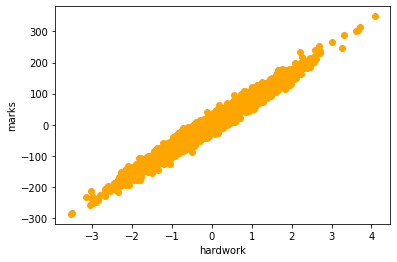

In [5]:
plt.scatter(X_train, y_train, color='orange')
plt.xlabel("hardwork")
plt.ylabel("marks")
plt.show()

In [6]:
X_train.shape

(3750, 1)

In [7]:
y_train.shape

(3750, 1)

### Preprocess - Col. Standaridzation
 - makes G.D works faster (converge)

In [8]:
mu = X_train.mean()
sig = X_train.std()

In [9]:
X_train = (X_train - mu)/ sig

# Linear Regression

In [10]:
def hypothesis(x, theta):
    """
    theta : np array (2,1)
    x : scaler 
    
    return : prediction given input(x)
    """
    return theta[0] + theta[1]*x

def error(X, Y, theta):
    """
    X - (3750, 1) 
    Y - (3750, 1) 
    theta - (2,1)
    
    return : total error for any hypothesis
    """
    
    m = X.shape[0]
    total_err = 0.0
    
    for i in range(m):
        yhat_i = hypothesis(X[i], theta)
        yi = Y[i]
        total_err += (yhat_i - yi)**2
    
    return total_err/m

def gradient(X, Y, theta):
    """
    X - (3750, 1) 
    Y - (3750, 1) 
    theta - (2,1)
    
    return : np array gradient (2,1)
    """
    m  = X.shape[0]
    
    grad = np.zeros(2)
    
    for i in range(m):
        yhat_i = hypothesis(X[i], theta)
        yi = Y[i]
        grad[0] += (yhat_i - yi)
        grad[1] += (yhat_i - yi)*X[i]
        
    return grad/m

def gradient_descent(X, Y, lr =0.1, max_itr = 100):
    """
    parameters: 
        X - (3750, 1) 
        Y - (3750, 1) 
        lr - learning rate
        max_itr  - maximum iteration
    
    ----------------------------------
    
    return : 
        theta vector (2,1)
        error_list  
    """
    
    
    theta = np.zeros(2,)
    
    error_list = []
    
    for i in range(max_itr):
        
        err = error(X, Y, theta)
        error_list.append(err[0])
        
        grad = gradient(X, Y, theta)
        
        # Updation Rule
        theta[0]  = theta[0] - lr*grad[0]
        theta[1] = theta[1]  - lr*grad[1]
        
    return (theta, error_list)

In [11]:
(opt_theta, error_list) = gradient_descent(X_train, y_train)

In [12]:
error_list[-5:]

[190.95559229260724,
 190.95558983779603,
 190.95558784939806,
 190.95558623879643,
 190.95558493420947]

In [13]:
opt_theta

array([ 0.6838508 , 79.90361453])

Text(0, 0.5, 'error')

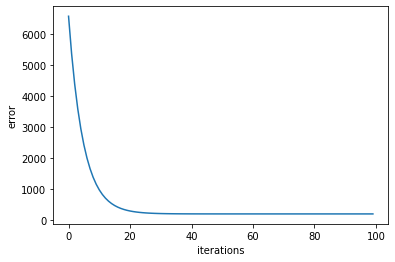

In [14]:
plt.plot(error_list)
plt.xlabel("iterations")
plt.ylabel("error")

In [15]:
X_train

array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

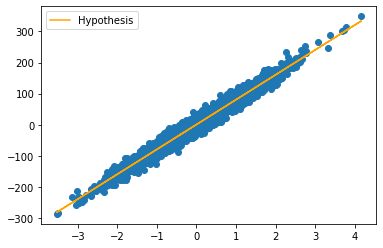

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train,hypothesis(X_train, opt_theta), color='orange', label="Hypothesis")
plt.legend()
plt.show()